In [39]:
# we need to read frames from the movie
# so we install opencv-python - change the next cell type to "Code"

In [40]:
import cv2

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from openpiv import pyprocess, piv

## Video creators

Please cite: 

Qualitative and quantitative schlieren optical measurement of the human thermal plume
AW Gena, C Voelker, GS Settles
Indoor Air 30 (4), 757-766
               

Qualitative evaluation of the flow supplied by personalized ventilation using schlieren imaging and thermography
H Alsaad, C Voelker
Building and Environment 167, 106450

 

The spread of breathing air from wind instruments and singers using schlieren techniques
L Becher, AW Gena, H Alsaad, B Richter, C Spahn, C Voelker
Indoor air 31 (6), 1798-1814


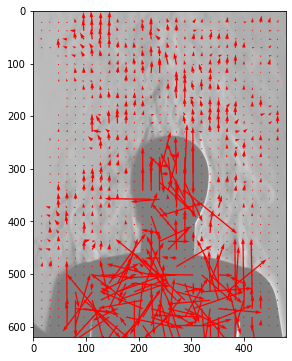

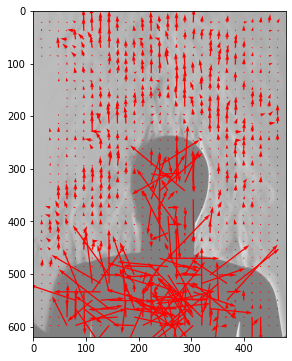

In [43]:
vidcap = cv2.VideoCapture('../test_movie/Manikin_Thermal_Plume.MOV')
success, image1 = vidcap.read()
count = 0

while success and count < 2:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    # print('Read a new frame: ', success)
    if success:
        x,y,u,v = piv.simple_piv(image1[100:,370:850].sum(axis=2), \
            image2[100:,370:850].sum(axis=2), plot=True);
        image1 = image2.copy()
        count += 1

In [44]:

vidcap = cv2.VideoCapture('../test_movie/Manikin_Thermal_Plume.MOV')
success, image1 = vidcap.read()
count = 0
U = []
V = []

while success:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    # print('Read a new frame: ', success)
    if success:
        x,y,u,v = piv.simple_piv(image1[100:,370:850].sum(axis=2), \
            image2[100:,370:850].sum(axis=2), plot=False);
        image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)

In [45]:
U = np.stack(U)
Umean = np.nanmean(U, axis=0)
V = np.stack(V)
Vmean = np.nanmean(V,axis=0)

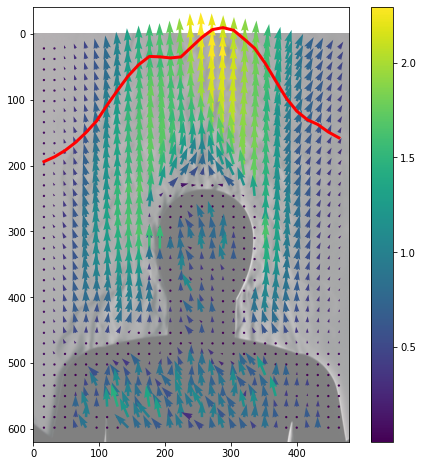

In [49]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(image1[100:,370:850],alpha=0.5)
cm = ax.quiver(x,y,Umean,-Vmean,np.abs(Vmean),scale=20,width=.008)
# plt.show()
plt.plot(x[10,:], np.nanmean(Vmean[:10],axis=0)*100+200,color='r',lw=3)
plt.colorbar(cm);